In [36]:
# Importing libraries and loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/Student/Downloads/ambika_internships/Data reports/ICBK_1to6_2020.csv")

             Price    Open    High    Low    Vol. Change %
Date                                                      
2020-06-30  351.45  347.00  354.45  346.3  47.53M    2.43%
2020-06-29  343.10  345.25  345.60  338.5  27.39M   -1.72%
2020-06-26  349.10  355.60  358.50  346.1  34.60M   -0.54%
2020-06-25  351.00  345.90  355.60  338.5  69.91M    0.83%
2020-06-24  348.10  380.00  380.00  345.0  57.96M   -7.46%


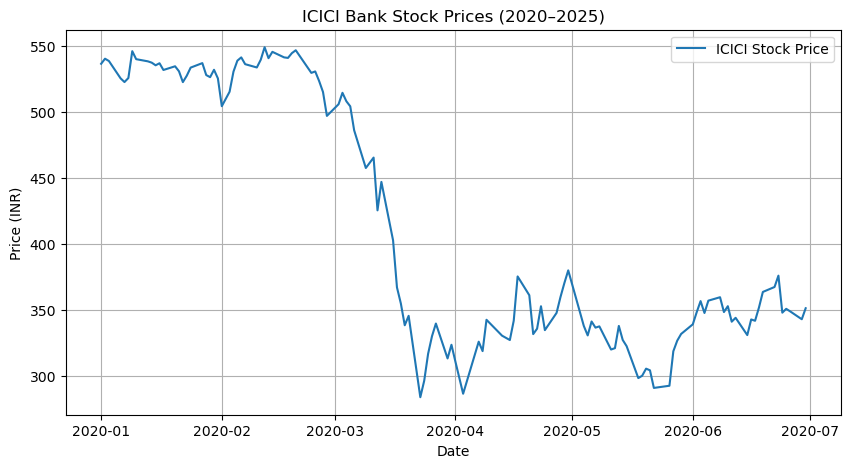

In [38]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df.set_index('Date', inplace=True)
print(df.head())
price_data = df['Price']

# Convert Price to numeric
price_data = price_data.replace(',', '', regex=True).astype(float)

# Plot to see data graphically 
plt.figure(figsize=(10, 5))
plt.plot(price_data, label='ICICI Stock Price')
plt.title('ICICI Bank Stock Prices (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

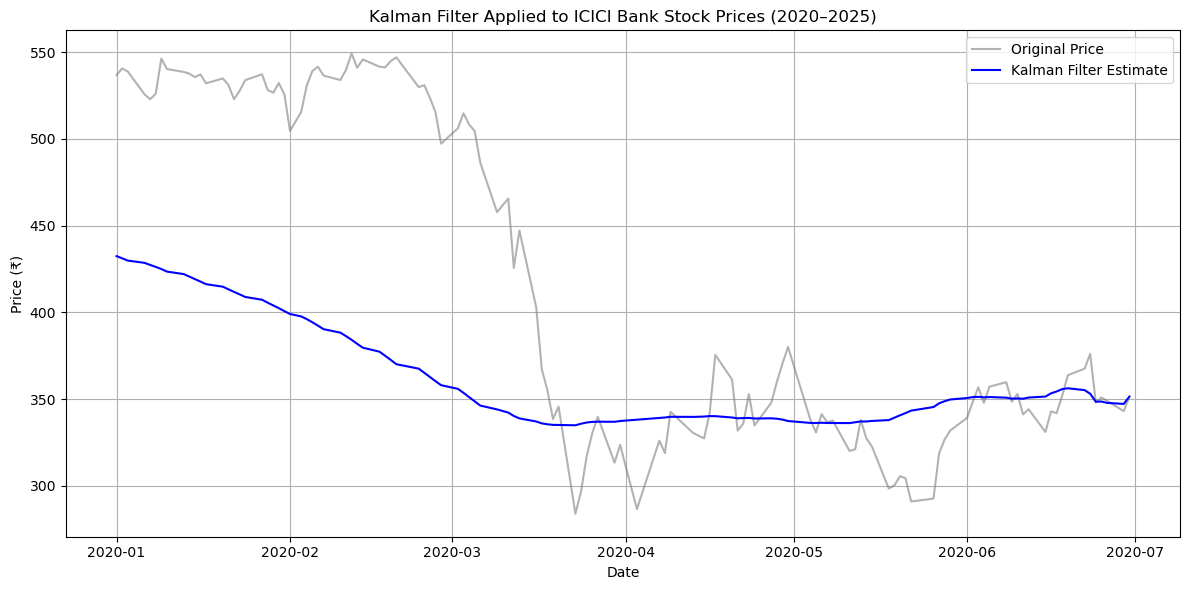

In [40]:
# Converting prices to a numpy array

observations = price_data.values
n = len(observations)

xhat = np.zeros(n)  # a estimate of x
P = np.zeros(n)   # a error estimate
xhatminus = np.zeros(n) 
Pminus = np.zeros(n)    
K = np.zeros(n)         

xhat[0] = observations[0]
P[0] = 1.0
Q = 0.0001  # Process variance 
R = 1.0     # Measurement variance 

# Kalman Filter
for k in range(1, n):
    xhatminus[k] = xhat[k-1] #Time update(prediction)
    Pminus[k] = P[k-1] + Q
    K[k] = Pminus[k] / (Pminus[k] + R) #Measurement update(correction)
    xhat[k] = xhatminus[k] + K[k] * (observations[k] - xhatminus[k])
    P[k] = (1 - K[k]) * Pminus[k]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(price_data.index, observations, label='Original Price', color='gray', alpha=0.6)
plt.plot(price_data.index, xhat, label='Kalman Filter Estimate', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.title('Kalman Filter Applied to ICICI Bank Stock Prices (2020–2025)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

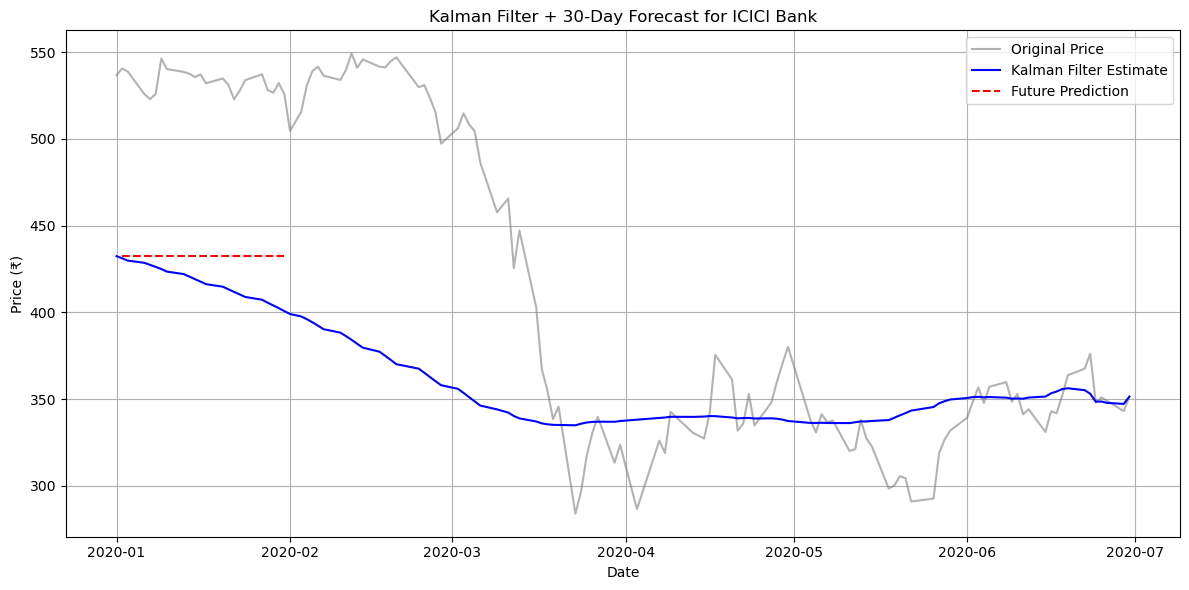

In [28]:
#Number of future days to predict
future_days = 30
future_xhat = np.zeros(future_days)
future_P = np.zeros(future_days)

future_xhat[0] = xhat[-1]
future_P[0] = P[-1] + Q

for k in range(1, future_days):
    future_xhat[k] = future_xhat[k-1]
    future_P[k] = future_P[k-1] + Q 

last_date = price_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Plotting the original and prediction
plt.figure(figsize=(12, 6))
plt.plot(price_data.index, observations, label='Original Price', color='gray', alpha=0.6)
plt.plot(price_data.index, xhat, label='Kalman Filter Estimate', color='blue')
plt.plot(future_dates, future_xhat, label='Future Prediction', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.title('Kalman Filter + 30-Day Forecast for ICICI Bank')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

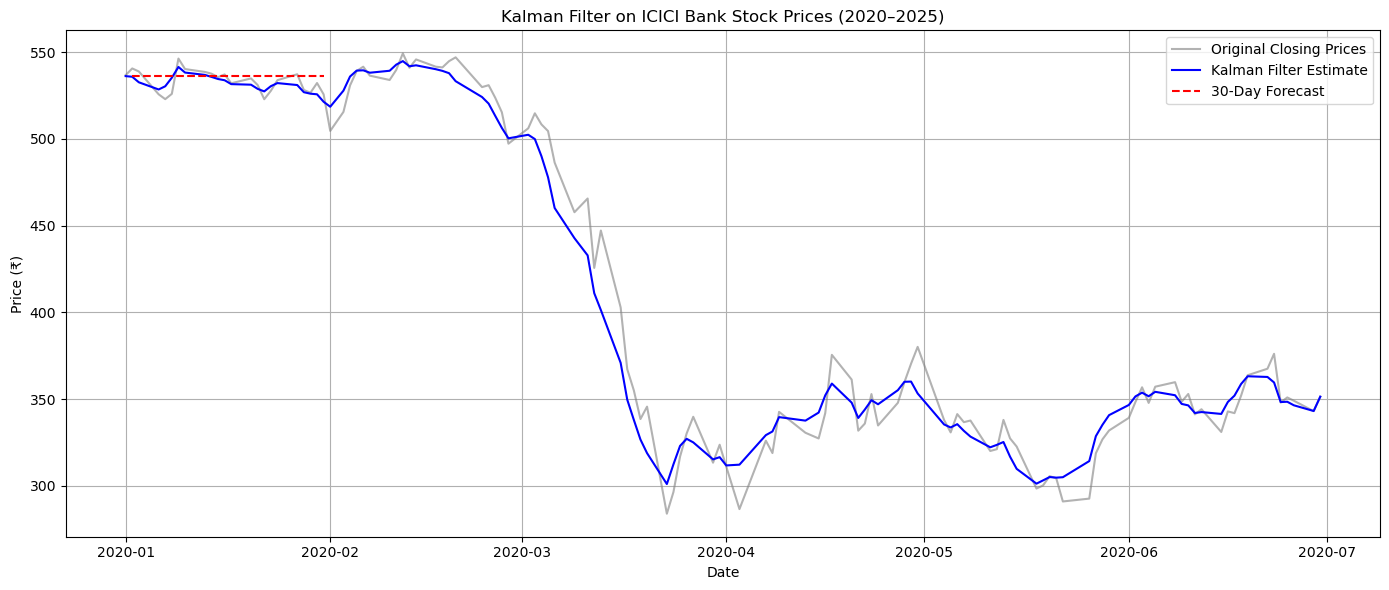

In [42]:
observations = df['Price'].values
n = len(observations)

xhat = np.zeros(n)
P = np.zeros(n)
xhatminus = np.zeros(n)
Pminus = np.zeros(n)
K = np.zeros(n)

xhat[0] = observations[0]
P[0] = 1.0
Q = 1e-5 * (max(observations) - min(observations))  #process noise
R = 0.1 ** 2  #measurement noise

#Kalman Filter
for k in range(1, n):
    xhatminus[k] = xhat[k - 1]
    Pminus[k] = P[k - 1] + Q
    K[k] = Pminus[k] / (Pminus[k] + R)
    xhat[k] = xhatminus[k] + K[k] * (observations[k] - xhatminus[k])
    P[k] = (1 - K[k]) * Pminus[k]

#Forecast future values
future_days = 30
future_xhat = np.zeros(future_days)
future_P = np.zeros(future_days)
future_xhat[0] = xhat[-1]
future_P[0] = P[-1] + Q

for k in range(1, future_days):
    future_xhat[k] = future_xhat[k - 1]
    future_P[k] = future_P[k - 1] + Q

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

#Plotting
plt.figure(figsize=(14, 6))
plt.plot(df.index, observations, label='Original Closing Prices', color='gray', alpha=0.6)
plt.plot(df.index, xhat, label='Kalman Filter Estimate', color='blue')
plt.plot(future_dates, future_xhat, label='30-Day Forecast', color='red', linestyle='--')
plt.title('Kalman Filter on ICICI Bank Stock Prices (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()